In [3]:

# Cell 1: Imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



ModuleNotFoundError: No module named 'sklearn'

In [ ]:

# Cell 2: Take user input instead of hardcoded data
n = int(input("Enter number of subjects: "))

subjects = []
difficulties = []
priorities = []
hours_per_week = []

for i in range(n):
    print(f"\nEnter details for subject {i+1}:")
    subject = input("Subject name: ")
    difficulty = int(input("Difficulty (1-5): "))
    priority = int(input("Priority (1-5): "))
    hours = int(input("Hours per week: "))

    subjects.append(subject)
    difficulties.append(difficulty)
    priorities.append(priority)
    hours_per_week.append(hours)

data = pd.DataFrame({
    'Subject': subjects,
    'Difficulty': difficulties,
    'Priority': priorities,
    'Hours_Per_Week': hours_per_week
})

data.to_csv("study_planner_dataset.csv", index=False)
print("\n✅ Data saved to study_planner_dataset.csv")



In [27]:
data.head()

,Subject,Difficulty,Priority,Hours_Per_Week
0,maths,4,3,5
1,chemistry,5,4,6


In [ ]:
data = pd.read_csv("study_planner_dataset.csv")
print("✅ Loaded dataset successfully.\n")

In [ ]:
X = data[['Difficulty', 'Priority']]
y = data['Hours_Per_Week']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained.")
print("Model Score (R^2):", model.score(X_test, y_test))


In [ ]:
# Cell 5: Visualize data
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



/tmp/ipykernel_5374/3812238741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subject', y='Recommended_Daily_Hours', data=data, palette='magma')
/tmp/ipykernel_5374/3812238741.py:7: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/user/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


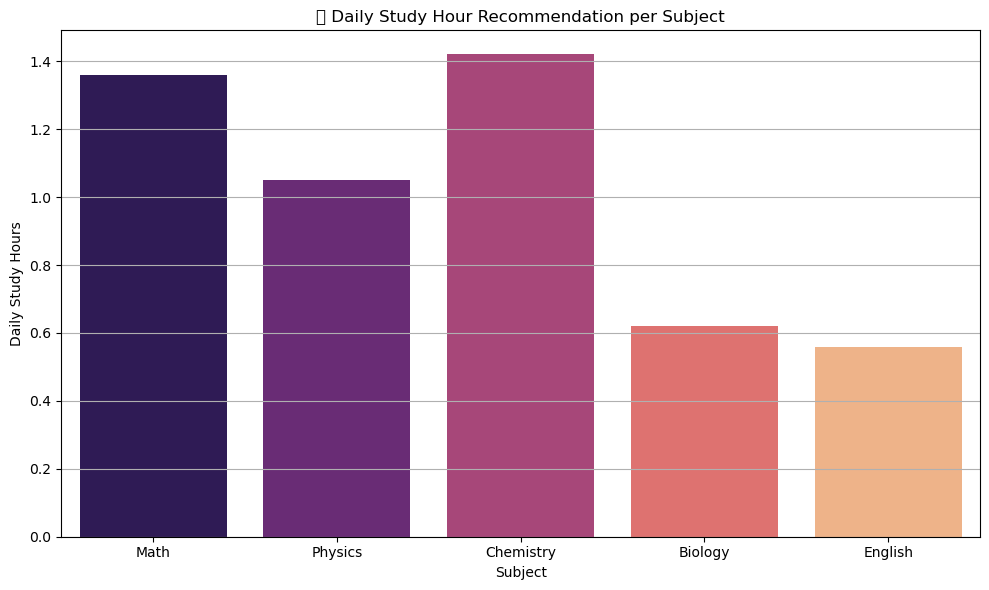

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Subject', y='Recommended_Daily_Hours', data=data, palette='magma')
plt.title('🎯 Daily Study Hour Recommendation per Subject')
plt.xlabel('Subject')
plt.ylabel('Daily Study Hours')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
print("\n📅 Weekly Study Plan Estimate (Daily hours × 7):\n")
data['Weekly_Hours'] = (data['Recommended_Daily_Hours'] * 7).round(1)
weekly_table = data[['Subject', 'Recommended_Daily_Hours', 'Weekly_Hours']]
print(weekly_table.to_string(index=False))

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Subject', y='Weekly_Hours', data=data, palette='viridis')

# Customize the plot
plt.title('📅 Weekly Study Hours per Subject', fontsize=14)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Total Hours per Week', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


ValueError: Could not interpret value `Weekly_Hours` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

In [19]:
data[['Subject', 'Recommended_Daily_Hours', 'Weekly_Hours']].to_csv("final_study_plan.csv", index=False)
print("\n💾 Your study plan has been saved to 'final_study_plan.csv'")


💾 Your study plan has been saved to 'final_study_plan.csv'
